In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
dataset = pd.read_csv('data\Iris.xls')
dataset.head(5)
#Vemos que hay 4 predictores - sepal length, sepal width, petal length y petal width. Species es la variable target
#que estamos interesados en predecir. Ya que se tratan de 3 clases de especies que queremos predecir se trata
#de un problema de multiclasificación.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Vamos a separar las columnas en características (X) y targets (y).
X = dataset.iloc[:, 1:5].values # select features ignoring non-informative column Id
y = dataset.iloc[:, 5].values # Species contains targets for our model

In [4]:
#Nuestros targets están almacenados como texto. Vamos a transformarlos en variables categóricas.
#Utilizaremos el Scikit-Learn label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) # transform species names into categorical values

In [5]:
#Dividimos el dataset en training set y test set para evaluar nuestro modelo entrenado apropiadamente
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [6]:
#We would now implement a working version in Python. The most important part of K-NN algorithm is the similarity metric 
#which in this case is a distance measure. There are several distance metrics but we would use Euclidean distance 
#which is the straight line distance between two points in a Euclidean plane. The plane may be 2-dimensional, 3-dimensional etc. 
#Euclidean distance is sometimes referred to as L2 distance.
#The L2 distance is computed from the test sample to every sample in the training set to determine how close they are. 
#We can implement L2 distance in Python using Numpy as shown below.

def euclidean_distance(training_set, test_instance):
    # number of samples inside training set
    n_samples = training_set.shape[0]
    
    # create array for distances
    distances = np.empty(n_samples, dtype=np.float64)
    
    # euclidean distance calculation
    for i in range(n_samples):
        distances[i] = np.sqrt(np.sum(np.square(test_instance - training_set[i])))
    return distances    

In [7]:
#Having implemented the similarity metric, we can build out a full fledged class that is capable of identifying 
#nearest neighbors and returning a classification. It should be noted that the K-Nearest Neighbor algorithm 
#has no training phase. It simply stores all data points in memory. It only performs computation during test time 
#when it is calculating distances and returning predictions. Here is an implementation of the K-NN algorithm that 
#utilizes the distance function defined above.

class MyKNeighborsClassifier():
    """

    Vanilla implementation of KNN algorithm.

    """
    
    def __init__(self, n_neighbors=5):
        self.n_neighbors=n_neighbors
    
    def fit(self, X, y):
        """
        Fit the model using X as array of features and y as array of labels.

        """
        n_samples = X.shape[0]
        
        # number of neighbors can't be larger then number of samples
        if self.n_neighbors > n_samples:
            raise ValueError("Number of neighbors can't be larger then number of samples in training set.")
        
        # X and y need to have the same number of samples
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in X and y need to be equal.")
        
        # finding and saving all possible class labels
        self.classes_ = np.unique(y)
        
        self.X = X
        self.y = y
    
    def pred_from_neighbors(self, training_set, labels, test_instance, k):
        distances = euclidean_distance(training_set, test_instance)
        
        # combining arrays as columns
        distances = sp.c_[distances, labels]
        
        # sorting array by value of first column
        sorted_distances = distances[distances[:,0].argsort()]
        
        # selecting labels associeted with k smallest distances
        targets = sorted_distances[0:k,1]
        
        unique, counts = np.unique(targets, return_counts=True)
        return(unique[np.argmax(counts)])
    
    def predict(self, X_test):
        
        # number of predictions to make and number of features inside single sample
        n_predictions, n_features = X_test.shape
        
        # allocationg space for array of predictions
        predictions = np.empty(n_predictions, dtype=int)
        
        # loop over all observations
        for i in range(n_predictions):
            # calculation of single prediction
            predictions[i] = self.pred_from_neighbors(self.X, self.y, X_test[i, :], self.n_neighbors)
        return(predictions)

#The workflow of the class above is that during test time, a test sample (instance) is supplied and the Euclidean distance 
#to every sample in the entire training set is calculated. Depending on the value of nearest neighbors to consider, 
#the labels of those neighbors participate in a vote to determine the class of the test sample.

In [8]:
#In order to generate a response or create a prediction, we first have to initialize our custom classifier. 
#The value of k, cannot exceed the number of samples in our dataset. This is to be expected because we cannot compare 
#with a greater number of neighbors than what we have available in the training set.

# instantiate learning model (k = 3)
my_classifier = MyKNeighborsClassifier(n_neighbors=3)

In [9]:
#Next we can train our model on the data. Remember in K-NN no training actually takes place.

# fitting the model
my_classifier.fit(X_train, y_train)

In [10]:
#To evaluate the accuracy of our model, we test its performance on examples which it has not seen 
#such as those contained in the test set.

# predicting the test set results
my_y_pred = my_classifier.predict(X_test)

In [11]:
#We then check the predicted classes against the ground truth labels and use Scikit-Learn accuracy module 
#to calculate the accuracy of our classifier.
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, my_y_pred)*100
print('Accuracy: ' + str(round(accuracy, 2)) + ' %.')
#Nuestro modelo alcanza una exactitud del 95.56%.

Accuracy: 95.56 %.


In [12]:
#we would use K-means algorithm to find clusters in the Iris dataset. The Iris dataset is a classic in the machine learning community.
#It contains 4 attributes (sepal length, sepal width, petal length, petal width) used to describe 3 species of the Iris plant.

# display first five observations
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
#We have 4 informative features and 6 columns. Id is an identifier while Species column contains the label. 
#Since this is a clustering task, we do not need labels as we would find clusters in an unsupervised manner.

x = dataset.drop(['Id', 'Species'], axis=1)
x = x.values # select values and convert dataframe to numpy array

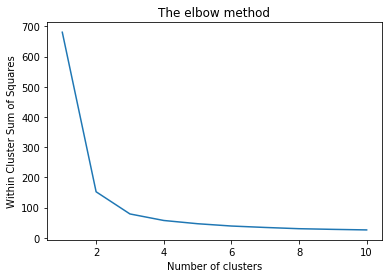

In [14]:
#The above line of code selects all our features into x dropping Id and Species.
#Because K-means is a flat clustering algorithm we need to specify the value of k (number of clusters) 
#before we run the algorithm. However, we do not know the optimal value for k, so we use a technique known as the elbow method. 
#The elbow method plots the percentage of variance explained as a result of number of clusters. 
#The optimal value of k from the graph would be the point where the sum of squared error (SSE) 
#does not improve significantly with increase in the number of clusters.

# finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = [] # array to hold sum of squared distances within clusters

for i in range(1, 11):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares') # within cluster sum of squares
plt.show()

In [15]:
#The k-means algorithm is run for 10 iterations, with n_clusters ranging from 1 to 10. At each iteration 
#the sum of squared error (SSE) is recoded. The sum of squared distances within each cluster configuration 
#is then plotted against the number of clusters. The “elbow” from the graph is 3 and this is the optimal value for k.

#Now that we know that the optimal value for k is 3, we create a K-means object using Scikit-Learn and set 
#the parameter of n_clusters (number of clusters to generate) to 3.

# creating the kmeans object
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [16]:
#Next we use the fit_predict method on our object. This returns a computation of cluster centers 
#and cluster predictions for each sample.
y_kmeans = kmeans.fit_predict(x)

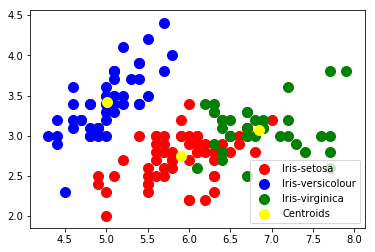

In [17]:
#We then plot the predictions for clusters using a scatter plot of the first two features.

# visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

#The plot shows 3 clusters - red, blue, green representing types of Iris plant, setosa, versicolour and virginica respectively. 
#The yellow point indicates the centroids which is at the center of each cluster.

#Our K-means algorithm was able to find the correct number of clusters which is 3 because we used the elbow method. 
#It would be observed that the original dataset had three types (classes) of Iris plant. Iris setosa, Iris versicolour 
#and Iris virginica. If this were posed as a classification problem we would have had 3 classes into which 
#we would have classified data points. However, because it was posed as a clustering problem, 
#we were still able to find the optimum number of clusters - 3, which is equal to the number of classes in our dataset.

#What this teaches us is that most classification problems and datasets can be used for unsupervised learning particularly 
#for clustering tasks. The main intuition to take out of this is that if we want to use a classification dataset for clustering,
#we must remove labels, that is we remove the component of the data that was annotated by a human to enable supervision. 
#We then train on the raw dataset to discover inherent patterns contained in the data distribution.